In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob

import cftime
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cmocean

import util
import oae_smyle

In [3]:
ds = oae_smyle.open_dataset(
    case='smyle-fosi.regional.santa-barbara.Jan1999.001',
    stream='pop.h.ecosys.nday1',
)
ds

<xarray.Dataset>
Dimensions:                 (time: 1095, d2: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, nlat: 384, nlon: 320)
Coordinates:
  * time                    (time) object 0347-01-01 12:00:00 ... 0349-12-31 ...
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    TLONG                   (nlat, nlon) float64 320.6 321.7 ... 319.4 319.8
    TLAT                    (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    time_delta              (time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/73)
    time_bound              (time, d2) float64 dask.array<chunksize=(31, 2), meta=np.ndarray>
    dz                      (time, z_t) float32 dask.array<chunksize=(31, 60), meta=np.ndarray>
    dzw                     (time, z_w) float32 dask.array<chunksize=(31, 60), meta=np.ndarray>
    KMU                     (time, nlat, nlon) float64 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    REGION_MASK             (time, nlat, nlon) float64 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    UAREA                   (time, nlat, nlon) float64 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    ...                      ...
    spC_zint_100m           (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    spCaCO3_zint_100m       (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    diatChl_SURF            (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    diatC_zint_100m         (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    diazChl_SURF            (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    diazC_zint_100m         (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
Attributes:
    title:             smyle-fosi.regional.santa-barbara.Jan1999.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-04-22 at 22:22:54.2
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

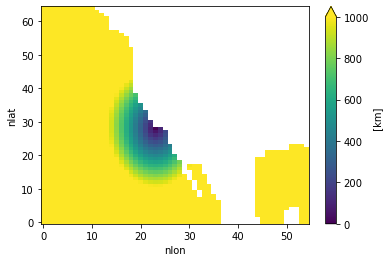

In [4]:
j, i = 283, 248

region_subset_plot = dict(
    nlat=slice(255, 320), nlon=slice(225, 280)
)

idist = util.haversine(
    ds.TLONG[j, i],
    ds.TLAT[j, i],
    ds.TLONG.values.ravel(),
    ds.TLAT.values.ravel(),
)

DIST = xr.DataArray(
    idist.reshape(ds.TLONG.shape),
    dims=("nlat", "nlon"),
    attrs={"units": "km"},
).where(ds.KMT > 0)

DIST.isel(**region_subset_plot).plot(vmax=1000)

In [5]:
nmolcm2s_to_mmolm2yr = 1.0e-9 * 1.0e4 * 86400.0 * 365.0 * 1e3

with xr.set_options(keep_attrs=True):
    flux_effect = ds.FG_CO2 - ds.FG_ALT_CO2
    flux_effect *= nmolcm2s_to_mmolm2yr
    flux_effect.attrs['units'] = 'mmol m$^{-2}$ yr$^{-1}$'

flux_effect

<xarray.DataArray (time: 1095, nlat: 384, nlon: 320)>
dask.array<mul, shape=(1095, 384, 320), dtype=float32, chunksize=(31, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time        (time) object 0347-01-01 12:00:00 ... 0349-12-31 12:00:00
    TLONG       (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    TLAT        (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    KMT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    time_delta  (time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     DIC Surface Gas Flux
    units:         mmol m$^{-2}$ yr$^{-1}$
    grid_loc:      2110
    cell_methods:  time: mean

In [15]:
flux_effect

<xarray.DataArray (time: 1095, nlat: 384, nlon: 320)>
dask.array<mul, shape=(1095, 384, 320), dtype=float32, chunksize=(31, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time        (time) object 0347-01-01 12:00:00 ... 0349-12-31 12:00:00
    TLONG       (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    TLAT        (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    KMT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    time_delta  (time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     DIC Surface Gas Flux
    units:         mmol m$^{-2}$ yr$^{-1}$
    grid_loc:      2110
    cell_methods:  time: mean

In [6]:
dt = ds.time_bound.diff('d2').squeeze()
dt.name = 'delta_t'
dt.attrs['units'] = ds.time.encoding['units'].split(' ')[0]
dt

<xarray.DataArray 'delta_t' (time: 1095)>
dask.array<getitem, shape=(1095,), dtype=float64, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * time        (time) object 0347-01-01 12:00:00 ... 0349-12-31 12:00:00
    time_delta  (time) float64 dask.array<chunksize=(31,), meta=np.ndarray>
Attributes:
    units:    days

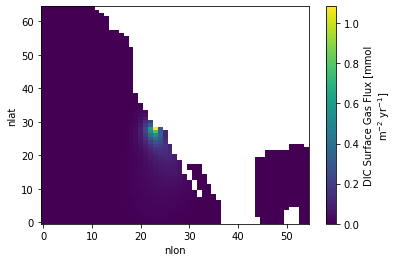

In [7]:
with xr.set_options(keep_attrs=True):
    flux_effect_tint = flux_effect.weighted(dt / 365.0).sum('time').where(ds.KMT > 0)

flux_effect_tint.isel(**region_subset_plot).plot()

In [8]:
time_days = ds.time_bound[:, 1]
time_days = time_days - ds.time_bound[0, 0]
time_days

<xarray.DataArray 'time_bound' (time: 1095)>
dask.array<sub, shape=(1095,), dtype=float64, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * time        (time) object 0347-01-01 12:00:00 ... 0349-12-31 12:00:00
    time_delta  (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

## Define bin to aggegrate in distance

Given the discrete nature of the grid, we want to avoid bin-widths that are too fine and yield non-uniform variation in aggregated area with increasing distance.

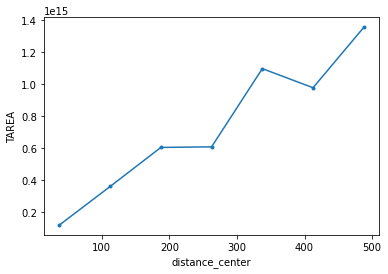

In [9]:
dx = 75

dist_bins = np.arange(0, 500 + dx, dx)
dist_bin_centers = np.vstack((dist_bins[:-1], dist_bins[1:])).mean(axis=0)
dist_bins

d = (
    ds.TAREA.groupby_bins(DIST, bins=dist_bins, include_lowest=True)
    .sum(["stacked_nlat_nlon"])
    .rename({"group_bins": "distance"})
)

d.plot(marker='.')

In [10]:
mmolyr_to_Gmolyr = 1e-3 * 1e-9
area_m2 = ds.TAREA.where(ds.KMT > 0) * 1e-4

with xr.set_options(keep_attrs=True):
    flux_effect_time_dist = (
        (flux_effect * area_m2).groupby_bins(DIST, bins=dist_bins,
                                             include_lowest=True)
        .sum(["stacked_nlat_nlon"])
        .rename({"group_bins": "distance"})
    )
    flux_effect_time_dist *= mmolyr_to_Gmolyr
    flux_effect_time_dist.attrs['units'] = 'Gmol yr$^{-1}$'

    flux_background_dist_time = (
        (ds.FG_ALT_CO2 * area_m2).groupby_bins(DIST, bins=dist_bins,
                                             include_lowest=True)
        .sum(["stacked_nlat_nlon"])
        .rename({"group_bins": "distance"})
    )
    flux_background_dist_time *= nmolcm2s_to_mmolm2yr * mmolyr_to_Gmolyr
    flux_background_dist_time.attrs['units'] = 'Gmol yr$^{-1}$'

flux_effect_time_dist['time'] = time_days
flux_effect_time_dist = flux_effect_time_dist.compute()

flux_background_dist_time['time'] = time_days
flux_background_dist_time = flux_background_dist_time.compute()

flux_effect_time_dist

<xarray.DataArray (time: 1095, distance: 7)>
array([[ 1.77662596e-03,  2.34470313e-05, -1.31369586e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.65139223e-03,  1.75859694e-04, -8.25763556e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.55326761e-02,  8.44347664e-04, -1.72090185e-06, ...,
        -1.66371627e-07,  0.00000000e+00,  2.73528834e-07],
       ...,
       [ 2.36148921e-05,  6.69632528e-05,  9.80158772e-05, ...,
         1.12665962e-04,  7.15369077e-05,  9.10733621e-05],
       [ 2.13793567e-05,  3.08387930e-05,  3.86460096e-05, ...,
         4.45562923e-05,  3.48621309e-05,  6.22439174e-05],
       [ 3.25344492e-06,  1.20919904e-05,  2.37132530e-05, ...,
         4.39628915e-05,  3.70587528e-05,  6.72088596e-05]])
Coordinates:
  * distance    (distance) object (-0.001, 75.0] ... (450.0, 525.0]
  * time        (time) float64 1.0 2.0 3.0 4.0 ... 1.093e+03 1.094e+03 1.095e+03
    time_delta  (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    long_name:     DIC Surface Gas Flux
    units:         Gmol yr$^{-1}$
    grid_loc:      2110
    cell_methods:  time: mean

Text(0.5, 1.05, 'Flux [Gmol yr$^{-1}$]')

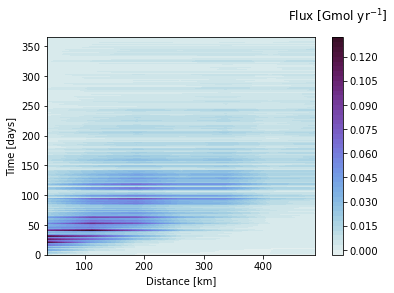

In [11]:
fig, ax = plt.subplots()

cf = ax.contourf(
    dist_bin_centers,
    flux_effect_time_dist.time,
    flux_effect_time_dist,
    levels=50,
    cmap=cmocean.cm.dense,
)

ax.set_ylim([0, 365])

ax.set_xlabel('Distance [km]')
ax.set_ylabel('Time [days]')

cb = plt.colorbar(cf)
cb.ax.set_title(f'Flux [{flux_effect_time_dist.units}]', y=1.05)


Text(0.5, 1.05, 'Flux [Gmol yr$^{-1}$]')

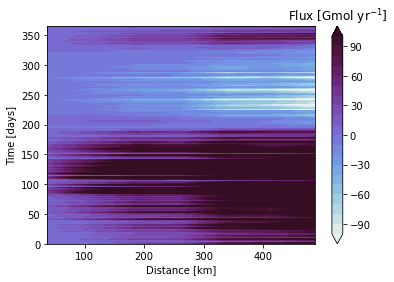

In [12]:
fig, ax = plt.subplots()

cf = ax.contourf(
    dist_bin_centers,
    flux_background_dist_time.time,
    flux_background_dist_time,
    levels=np.arange(-100, 110, 10),
    cmap=cmocean.cm.dense,
    extend='both',
)

ax.set_ylim([0, 365])

ax.set_xlabel('Distance [km]')
ax.set_ylabel('Time [days]')

cb = plt.colorbar(cf)
cb.ax.set_title(f'Flux [{flux_effect_time_dist.units}]', y=1.05)


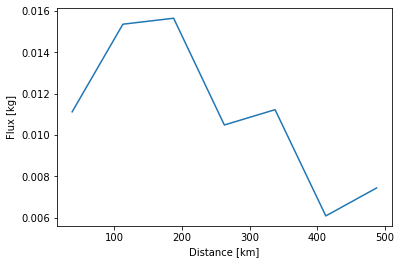

In [13]:
# assumes daily data
(flux_effect_time_dist * 1.0 / 365.0).sum('time').plot();
plt.xlabel('Distance [km]')
plt.ylabel('Flux [kg]');

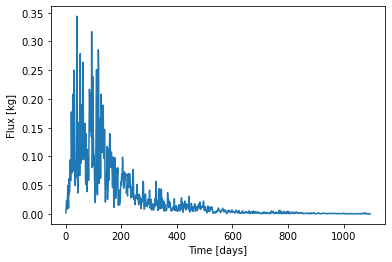

In [14]:
flux_effect_time_dist.sum('distance').plot();

plt.xlabel('Time [days]')
plt.ylabel('Flux [kg]');
